In [257]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt

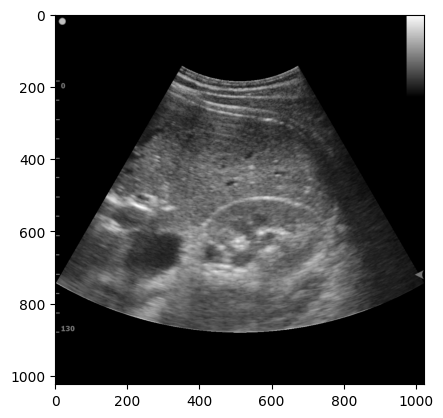

In [258]:
scan = io.imread("20220211184120.png", as_gray = True)
plt.imshow(scan, cmap='gray')
plt.show()

In [259]:
scan.shape

(1024, 1024)

In [260]:
scan

array([[0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.        , 0.        , 0.        , ..., 0.99215686, 0.99215686,
        0.99215686],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

D:\EDUCATION\SmartScan\5. 7.5L37HD - A. Carotis communis (dex)\RawFloatCine.dat

In [261]:
frames = 2
rows = 4
columns = 3
image = np.array((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24))
image = np.reshape(image, (frames, rows, columns))
image


array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18],
        [19, 20, 21],
        [22, 23, 24]]])

In [262]:
image[0]

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [263]:
frames = 15
rows = 192 # samples per beams
columns = 512 # samples per beam
image = np.fromfile('D:/EDUCATION/SmartScan/5. 7.5L37HD - A. Carotis communis (dex)/RawFloatCine.dat', dtype='uint32')
image = np.reshape(image, (frames, rows, columns))
image = image.astype('float32')
image.shape

(15, 192, 512)

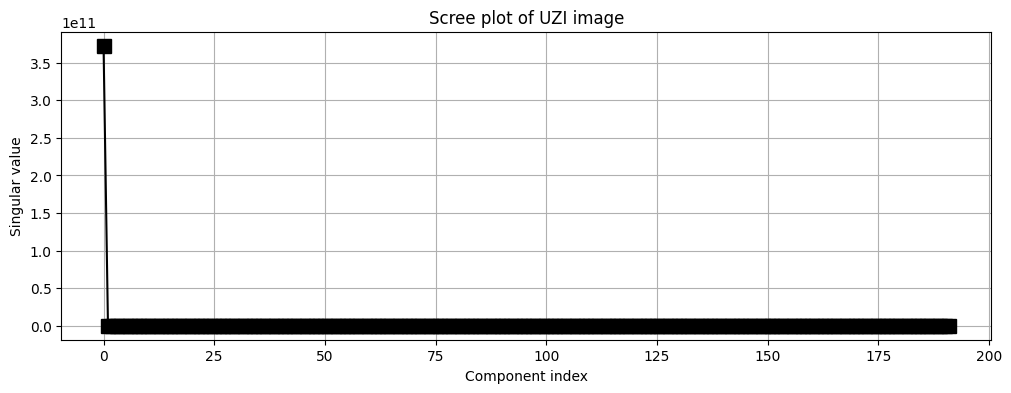

In [266]:
U,s,Vt = np.linalg.svd(image[0])
S = np.zeros_like(image[0])
np.fill_diagonal(S,s)

# show screen plot
plt.figure(figsize=(12,4))
plt.plot(s[:len(s)],'ks-', markersize=10)
plt.xlabel('Component index')
plt.ylabel('Singular value')
plt.title('Scree plot of UZI image')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Vt')

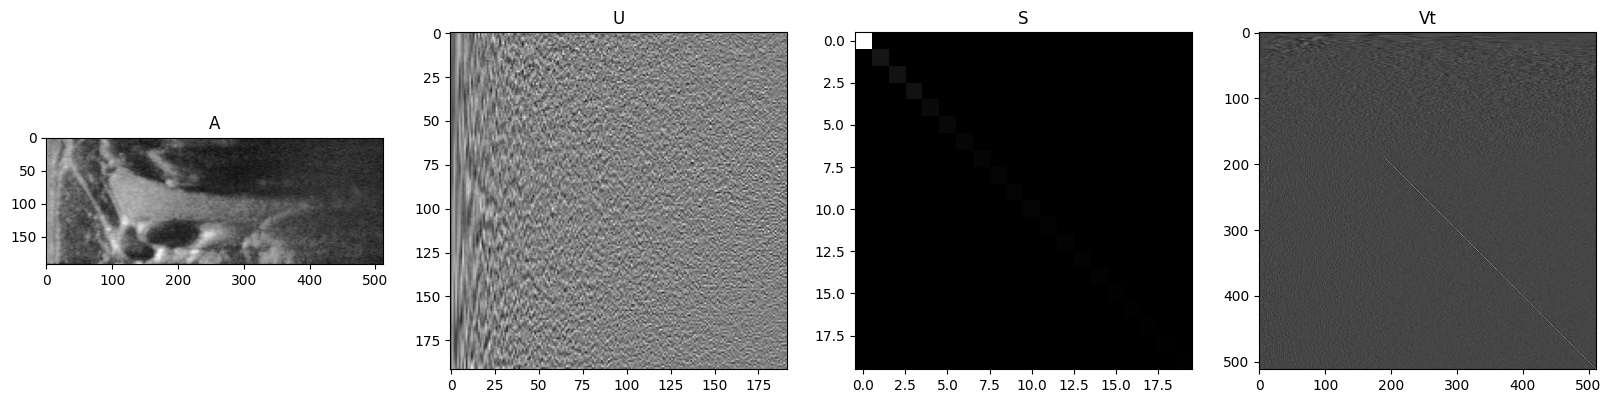

In [279]:
_,axs = plt.subplots(1,4,figsize=(20,10))

axs[0].imshow(image[0], aspect='equal', cmap='gray')
axs[0].set_title('A')

axs[1].imshow(U, aspect='equal', cmap='gray')
axs[1].set_title('U')

axs[2].imshow(S[:20,:20].astype('uint32'), aspect='equal', cmap='gray')
axs[2].set_title('S')

axs[3].imshow(Vt, aspect='equal', cmap='gray')
axs[3].set_title('Vt')

Text(0.5, 1.0, 'Scree plot')

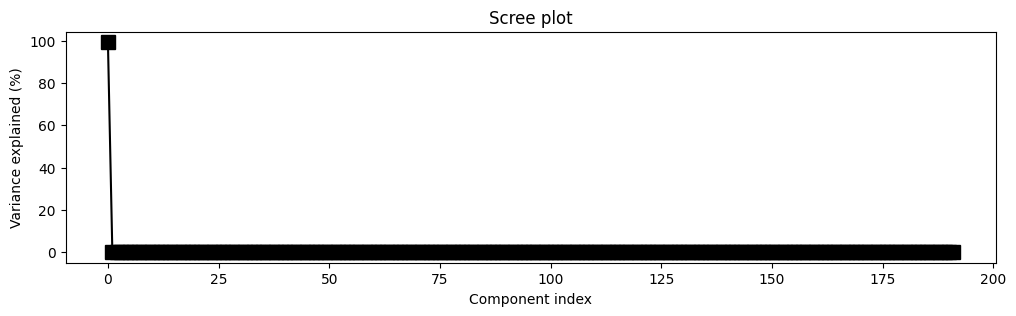

In [269]:
plt.figure(figsize=(12,3))
plt.plot(100*s/np.sum(s),'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Variance explained (%)')
plt.title('Scree plot')

In [278]:
#fig = plt.figure(figsize=(25,40))
#for i in range(frames):
#    sub = fig.add_subplot(8, 2, i + 1)
#    sub.imshow(image[i], cmap='gray')